# Optimizer Example
MNIST RNN example showing comparison between *newer* optimizers.

Richard Henry, 15-Jul-2024

In [1]:
#Import Libararies
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

Test Libraries

In [2]:
# Check python version
from platform import python_version
print(python_version())
#3.12.3

3.12.3


In [3]:
# Check tensorflow version
tf.__version__
#2.16.1

'2.16.2'

In [4]:
# Check keras version
tf.keras.__version__
#3.4.1

'3.4.1'

# MNIST RNN
Here we examine optimizers that appeared *after* Adam.

Adapted from Keras Documentation (via Kaggle).
https://www.kaggle.com/code/ankan1998/image-classification-with-recurrent-neural-network

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28,28)
batch_size = 64
num_epochs = 15

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28)
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Build & train model function
def model_build(myOpti,   #Optimizer
                myClas,   #Number of Outputs
                myShap,   #Input Array Shape
                myBatc,   #Batch Size
                myEpoc,   #Number of Epochs
                myxTra,   #x_train
                myyTra,   #y_train
                myxTes,   #x_test
                myyTes):  #y_test
    #Build it exactly the same every time
    tf.random.set_seed(19)
    model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=myShap),
            #tf.keras.layers.Rescaling(1.0/255),
            tf.keras.layers.SimpleRNN(128),
            tf.keras.layers.Dense(128,
                           activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(myClas,
                                  activation="softmax"),
        ]
    )
    model.compile(loss="categorical_crossentropy",
                  optimizer=myOpti,
                  metrics=["accuracy"])
    myHis=model.fit(myxTra,
                    myyTra,
                    batch_size=myBatc,
                    epochs=myEpoc,
                    validation_split=0.1)
    score = model.evaluate(myxTes,
                           myyTes,
                           verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    return myHis

### First Model, LION

In [7]:
%%time
h0=model_build('lion',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7793 - loss: 0.6996 - val_accuracy: 0.8702 - val_loss: 0.4447
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7698 - loss: 0.7688 - val_accuracy: 0.7153 - val_loss: 0.9304
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5204 - loss: 1.4027 - val_accuracy: 0.6007 - val_loss: 1.0636
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3949 - loss: 1.6606 - val_accuracy: 0.4518 - val_loss: 1.4008
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3629 - loss: 1.6006 - val_accuracy: 0.4513 - val_loss: 1.3990
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3760 - loss: 1.5791 - val_accuracy: 0.4337 - val_loss: 1.3971
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3692 - loss: 1.5994 - val_accuracy: 0.3222 - val_loss: 1.7726
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2810 - loss: 1.8714 - val_accuracy: 0.

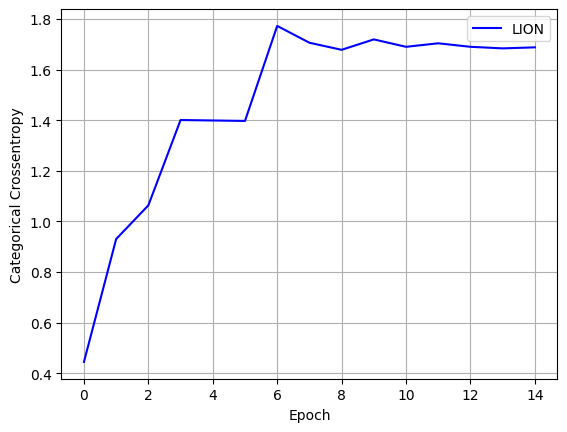

In [8]:
plt.plot(h0.history['val_loss'], color='blue')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['LION'])
plt.grid()
plt.show()

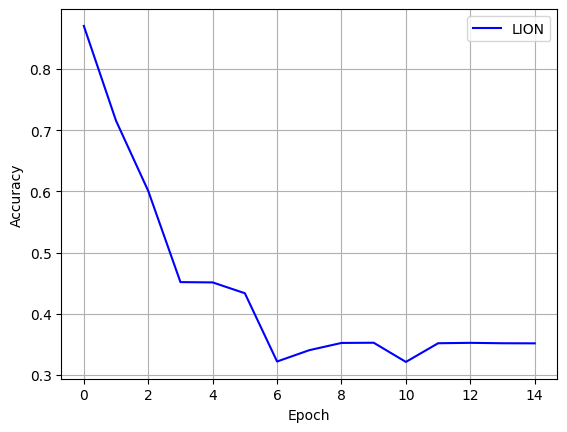

In [9]:
plt.plot(h0.history['val_accuracy'],color='blue')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION'])
plt.grid()
plt.show()

#### Commentary
Lorem Ipsum
### Second Model, AdaFactor

In [10]:
%%time
h1=model_build('adafactor',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5827 - loss: 1.3539 - val_accuracy: 0.8978 - val_loss: 0.3564
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8745 - loss: 0.4154 - val_accuracy: 0.9323 - val_loss: 0.2371
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9093 - loss: 0.3018 - val_accuracy: 0.9413 - val_loss: 0.1907
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9249 - loss: 0.2479 - val_accuracy: 0.9482 - val_loss: 0.1609
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9335 - loss: 0.2150 - val_accuracy: 0.9552 - val_loss: 0.1426
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9424 - loss: 0.1914 - val_accuracy: 0.9583 - val_loss: 0.1306
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9455 - loss: 0.1776 - val_accuracy: 0.9622 - val_loss: 0.1218
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9519 - loss: 0.1626 - val_accuracy: 0.

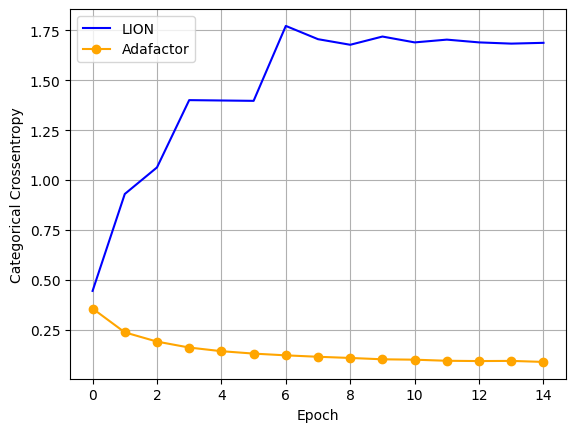

In [11]:
plt.plot(h0.history['val_loss'], color='blue')
plt.plot(h1.history['val_loss'], color='orange',marker='o')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['LION','Adafactor'])
plt.grid()
plt.show()

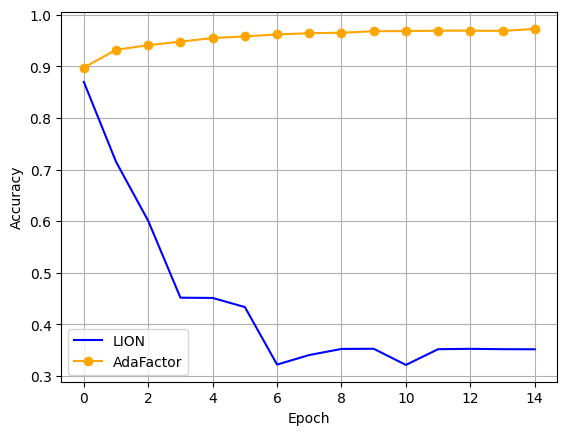

In [12]:
plt.plot(h0.history['val_accuracy'],color='blue')
plt.plot(h1.history['val_accuracy'],color='orange',marker='o')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor'])
plt.grid()
plt.show()

#### Commentary
Lorem Impsum
### Third Model, Adam + Weight Decay

In [13]:
%%time
h2=model_build('adamw',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7750 - loss: 0.6997 - val_accuracy: 0.9543 - val_loss: 0.1512
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9357 - loss: 0.2203 - val_accuracy: 0.9592 - val_loss: 0.1421
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9490 - loss: 0.1712 - val_accuracy: 0.9632 - val_loss: 0.1253
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9582 - loss: 0.1499 - val_accuracy: 0.9693 - val_loss: 0.1079
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9608 - loss: 0.1341 - val_accuracy: 0.9730 - val_loss: 0.0949
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9641 - loss: 0.1224 - val_accuracy: 0.9640 - val_loss: 0.1207
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9685 - loss: 0.1101 - val_accuracy: 0.9695 - val_loss: 0.1049
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9658 - loss: 0.1196 - val_accuracy: 0.

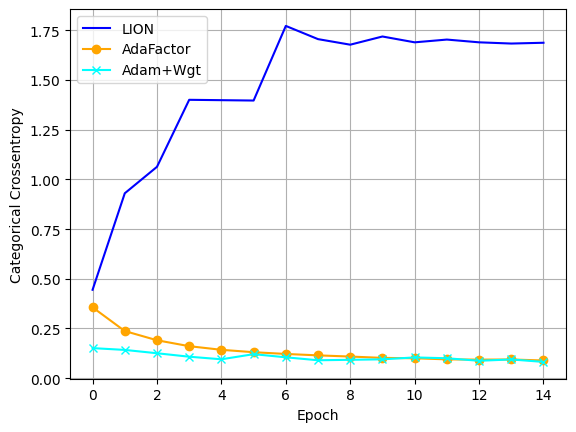

In [14]:
plt.plot(h0.history['val_loss'],color='blue')
plt.plot(h1.history['val_loss'],color='orange',marker='o')
plt.plot(h2.history['val_loss'],color='cyan',marker='x')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','Adam+Wgt'])
plt.grid()
plt.show()

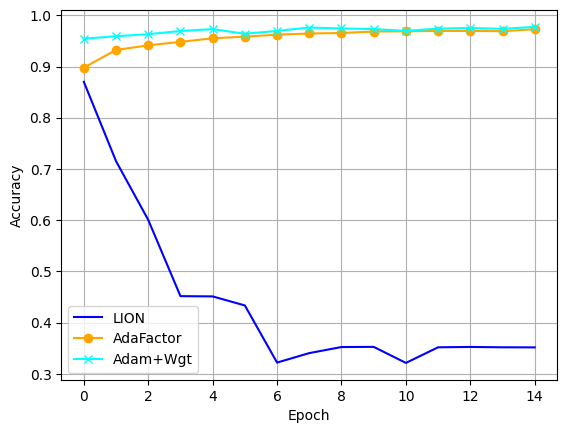

In [15]:
plt.plot(h0.history['val_accuracy'],color='blue')
plt.plot(h1.history['val_accuracy'],color='orange',marker='o')
plt.plot(h2.history['val_accuracy'],color='cyan',marker='x')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','Adam+Wgt'])
plt.grid()
plt.show()

#### Commentary
Lorem Impsum
### Fourth Model, ADAM

In [16]:
%%time
h3=model_build('adam',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7903 - loss: 0.6588 - val_accuracy: 0.9568 - val_loss: 0.1518
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9403 - loss: 0.1962 - val_accuracy: 0.9723 - val_loss: 0.0973
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9517 - loss: 0.1643 - val_accuracy: 0.9617 - val_loss: 0.1314
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9549 - loss: 0.1536 - val_accuracy: 0.9700 - val_loss: 0.1069
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9601 - loss: 0.1378 - val_accuracy: 0.9757 - val_loss: 0.0942
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9614 - loss: 0.1344 - val_accuracy: 0.9743 - val_loss: 0.0925
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9624 - loss: 0.1285 - val_accuracy: 0.9683 - val_loss: 0.1061
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9648 - loss: 0.1244 - val_accuracy: 0.

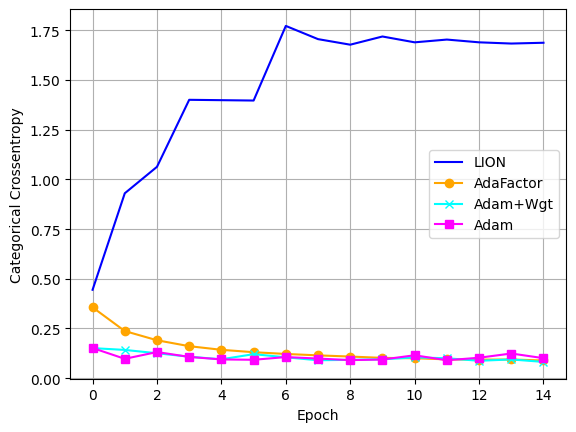

In [17]:
plt.plot(h0.history['val_loss'],color='blue')
plt.plot(h1.history['val_loss'],color='orange',marker='o')
plt.plot(h2.history['val_loss'],color='cyan',marker='x')
plt.plot(h3.history['val_loss'],color='magenta',marker='s')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','Adam+Wgt','Adam'])
plt.grid()
plt.show()

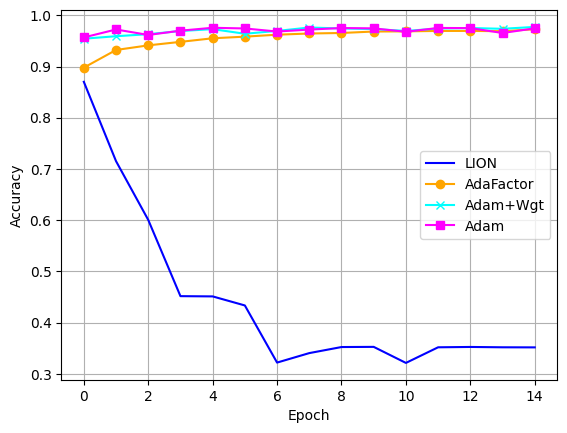

In [18]:
plt.plot(h0.history['val_accuracy'],color='blue')
plt.plot(h1.history['val_accuracy'],color='orange',marker='o')
plt.plot(h2.history['val_accuracy'],color='cyan',marker='x')
plt.plot(h3.history['val_accuracy'],color='magenta',marker='s')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','Adam+Wgt','Adam'])
plt.grid()
plt.show()

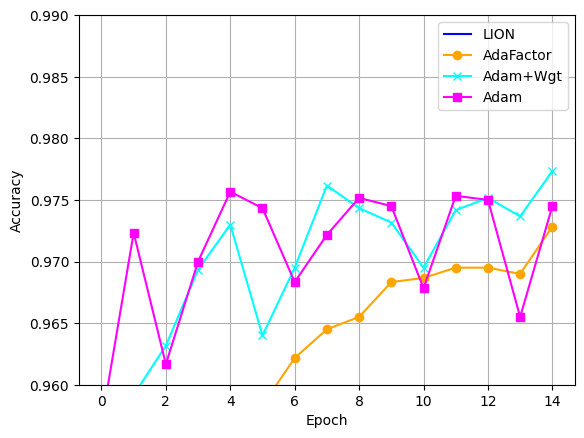

In [19]:
plt.plot(h0.history['val_accuracy'],color='blue')
plt.plot(h1.history['val_accuracy'],color='orange',marker='o')
plt.plot(h2.history['val_accuracy'],color='cyan',marker='x')
plt.plot(h3.history['val_accuracy'],color='magenta',marker='s')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','Adam+Wgt','Adam'])
plt.grid()
plt.ylim([0.96,0.99])
plt.show()

5th Model, Adam with Nesterov Momentum

In [20]:
%%time
h4=model_build('nadam',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7909 - loss: 0.6505 - val_accuracy: 0.9593 - val_loss: 0.1345
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9397 - loss: 0.1966 - val_accuracy: 0.9693 - val_loss: 0.1103
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9538 - loss: 0.1544 - val_accuracy: 0.9717 - val_loss: 0.1013
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9604 - loss: 0.1327 - val_accuracy: 0.9717 - val_loss: 0.1038
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9636 - loss: 0.1196 - val_accuracy: 0.9742 - val_loss: 0.0919
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9664 - loss: 0.1123 - val_accuracy: 0.9782 - val_loss: 0.0793
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9684 - loss: 0.1039 - val_accuracy: 0.9802 - val_loss: 0.0746
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9685 - loss: 0.1069 - val_accuracy: 0.

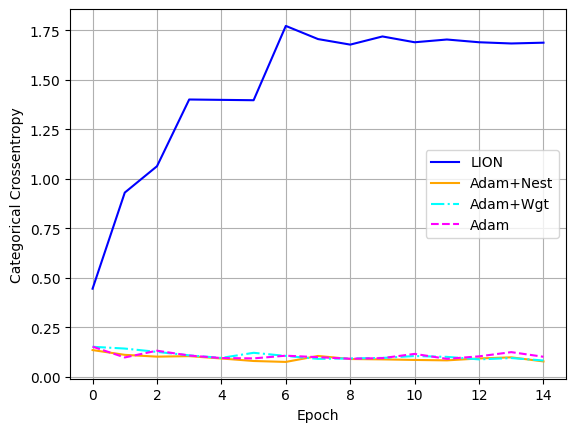

In [21]:
plt.plot(h0.history['val_loss'],color='blue',linestyle='solid')
plt.plot(h4.history['val_loss'],color='orange',linestyle='solid')
plt.plot(h2.history['val_loss'],color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_loss'],color='magenta',linestyle='dashed')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['LION','Adam+Nest','Adam+Wgt','Adam'])
plt.grid()
plt.show()

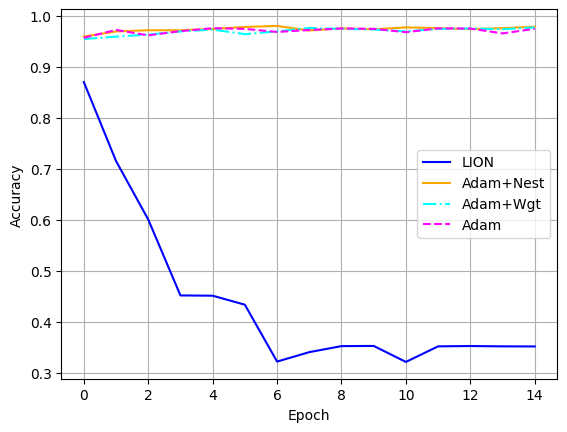

In [22]:
plt.plot(h0.history['val_accuracy'], color='blue',linestyle='solid')
plt.plot(h4.history['val_accuracy'], color='orange',linestyle='solid')
plt.plot(h2.history['val_accuracy'], color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_accuracy'], color='magenta',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION','Adam+Nest','Adam+Wgt','Adam'])
plt.grid()
plt.show()

6th Model, Follow the Regularized Leader

In [23]:
%%time
h5=model_build('ftrl',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1127 - loss: 2.3028 - val_accuracy: 0.1050 - val_loss: 2.3024
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1149 - loss: 2.3022 - val_accuracy: 0.1050 - val_loss: 2.3023
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1149 - loss: 2.3021 - val_accuracy: 0.1050 - val_loss: 2.3022
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1149 - loss: 2.3020 - val_accuracy: 0.1050 - val_loss: 2.3022
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1149 - loss: 2.3019 - val_accuracy: 0.1050 - val_loss: 2.3021
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1149 - loss: 2.3018 - val_accuracy: 0.1050 - val_loss: 2.3021
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1149 - loss: 2.3018 - val_accuracy: 0.1050 - val_loss: 2.3021
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1149 - loss: 2.3017 - val_accuracy: 0.

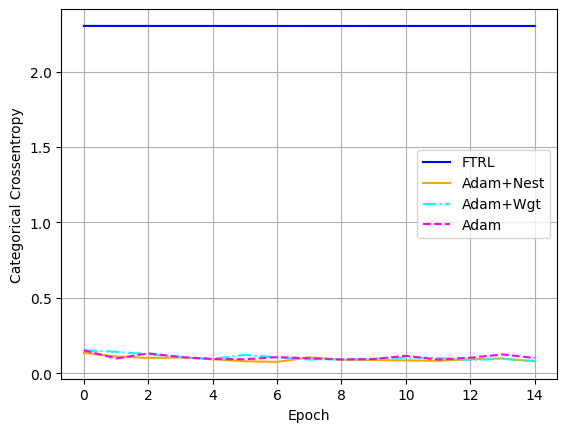

In [24]:
plt.plot(h5.history['val_loss'],color='blue',linestyle='solid')
plt.plot(h4.history['val_loss'],color='orange',linestyle='solid')
plt.plot(h2.history['val_loss'],color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_loss'],color='magenta',linestyle='dashed')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['FTRL','Adam+Nest','Adam+Wgt','Adam'])
plt.grid()
plt.show()

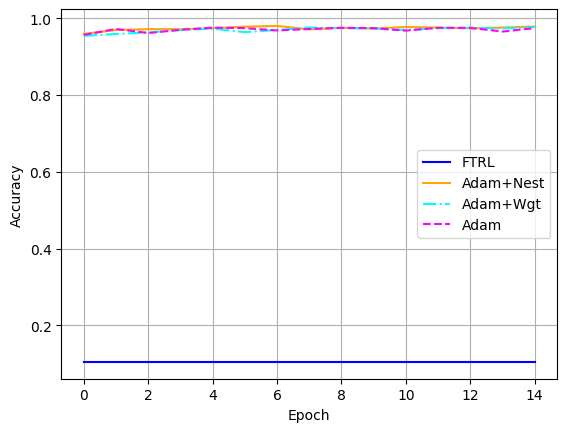

In [25]:
plt.plot(h5.history['val_accuracy'], color='blue',linestyle='solid')
plt.plot(h4.history['val_accuracy'], color='orange',linestyle='solid')
plt.plot(h2.history['val_accuracy'], color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_accuracy'], color='magenta',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['FTRL','Adam+Nest','Adam+Wgt','Adam'])
plt.grid()
plt.show()

#### Commentary
Lorem Ipsum
# Conclusions
Blah blah blah